**Predicción de Géneros Cinematográficos en IMDb**


Este proyecto tiene como objetivo analizar los géneros cinematográficos en IMDb para predecir cuáles seguirán siendo relevantes en el futuro y cuáles podrían disminuir su popularidad, todo ello utilizando técnicas de análisis de datos y aprendizaje automático.

La relevancia del proyecto radica en abordar preguntas clave sobre el mercado del entretenimiento, como identificar géneros con mayor potencial de éxito, evaluar su impacto en los ingresos y comprender cómo evolucionan las preferencias del público.


**Lista de tecnologías utilizadas**


*   Python: Para el análisis y procesamiento de datos
*   Pandas: Para la transformación eficiente de los datos


*   Scikit-learn: Implementación de modelos de aprendizaje automático, optimización y evaluación

*   Plotly: Visualizaciones interactivas para explorar los datos
*   Google Colab: Entorno de ejecución para el análisis y entrenamiento del modelo
*   Power BI: Creación de paneles visuales para comunicar resultados





#Paso 1: Importar Librerías

- Importamos las librerías necesarias para la manipulación de datos y análisis. Incluye Pandas, Seaborn y otras herramientas esenciales para este proyecto.



In [ ]:
# Manipulación de datos y cálculos
import pandas as pd       # Para manipulación de datos
import numpy as np        # Para cálculos numéricos

# Visualización de datos
import matplotlib.pyplot as plt  # Visualizaciones gráficas
import seaborn as sns            # Visualizaciones estadísticas
import missingno as msno         # Visualización de datos faltantes
import plotly.express as px      # Visualizaciones interactivas

# Manejo de advertencias
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Preprocesamiento y modelado predictivo
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline



# Otras herramientas
from collections import Counter
import sqlite3
import requests
import time








# Configuración de visualización opcional
sns.set_style('darkgrid')  # Establecer el estilo directamente desde Seaborn



**Paso 2: Cargar Datasets**

Objetivo: Cargar todos los datasets necesarios y filtrar por películas, excluyendo series de TV o episodios

In [ ]:
# Cargar datasets de IMDb
df_basics = pd.read_csv('ImdbTitleBasics.csv', low_memory=False)
df_akas = pd.read_csv('ImdbTitleAkas.csv', low_memory=False)
df_crew = pd.read_csv('ImdbTitleCrew.csv')
df_principals = pd.read_csv('ImdbTitlePrincipals.csv')
df_ratings = pd.read_csv('ImdbTitleRatings.csv')

# Filtrar solo películas
df_movies = df_basics[df_basics['titleType'] == 'movie']
movie_ids = df_movies['tconst']

# Filtrar datasets relacionados con películas usando los IDs de las películas
df_akas_movies = df_akas[df_akas['titleId'].isin(movie_ids)]
df_crew_movies = df_crew[df_crew['tconst'].isin(movie_ids)]
df_principals_movies = df_principals[df_principals['tconst'].isin(movie_ids)]
df_ratings_movies = df_ratings[df_ratings['tconst'].isin(movie_ids)]

# Guardar datasets filtrados
df_movies.to_csv('ImdbTitleBasics_movies.csv', index=False)
df_akas_movies.to_csv('ImdbTitleAkas_movies.csv', index=False)
df_crew_movies.to_csv('ImdbTitleCrew_movies.csv', index=False)
df_principals_movies.to_csv('ImdbTitlePrincipals_movies.csv', index=False)
df_ratings_movies.to_csv('ImdbTitleRatings_movies.csv', index=False)

# Mostrar primeros registros de los datasets filtrados
print("ImdbTitleBasics_movies.csv")
display(df_movies.head())

print("ImdbTitleAkas_movies.csv")
display(df_akas_movies.head())

print("ImdbTitleCrew_movies.csv")
display(df_crew_movies.head())

print("ImdbTitlePrincipals_movies.csv")
display(df_principals_movies.head())

print("ImdbTitleRatings_movies.csv")
display(df_ratings_movies.head())



Paso 3: Exploración de Datos (EDA)

Realizamos un análisis exploratorio de los datos para comprender mejor las características principales del dataset. Este paso incluye describir las columnas, identificar valores nulos y revisar distribuciones básicas entre los diferentes datasets

In [ ]:
#Cargar los datasets originales
df_basics = pd.read_csv('ImdbTitleBasics_movies.csv', low_memory=False)
df_akas = pd.read_csv('ImdbTitleAkas_movies.csv', low_memory=False)
df_crew = pd.read_csv('ImdbTitleCrew_movies.csv', low_memory=False)
df_ratings = pd.read_csv('ImdbTitleRatings_movies.csv', low_memory=False)

# Seleccionamos solo las columnas más importantes de cada DataFrame
df_basics = df_basics[['tconst', 'titleType', 'primaryTitle', 'originalTitle',
                       'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']]
df_crew = df_crew[['tconst', 'directors', 'writers']]
df_ratings = df_ratings[['tconst', 'averageRating', 'numVotes']]

# Combinamos los DataFrames usando la columna tconst como nexo de unión entre los datasets
df_combined = pd.merge(df_basics, df_crew, on='tconst', how='left')
df_combined = pd.merge(df_combined, df_ratings, on='tconst', how='left')

# Visualizar el DataFrame combinado
display(df_combined.head())

# Obtener la forma del DataFrame combinado
print("Forma de df_combined:", df_combined.shape)

# Revisar tipos de datos y valores nulos
print(df_combined.info())

# Ver estadística descriptiva de las columnas numéricas
print(df_combined.describe())

# Ver cuántos valores nulos tiene cada columna
print("Valores nulos por columna:")
print(df_combined.isnull().sum())




Columnas en df_basics: Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')
Columnas en df_akas: Index(['titleId', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'isOriginalTitle'],
      dtype='object')
Columnas en df_crew: Index(['tconst', 'directors', 'writers'], dtype='object')
Columnas en df_ratings: Index(['tconst', 'averageRating', 'numVotes'], dtype='object')
tconst no está presente en df_akas
No se puede combinar con df_akas, tconst no está presente.


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
0,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,nm0063413,"nm0063413,nm0657268,nm0675388",4.5,8.0
1,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",nm0846879,nm0846879,6.1,624.0
2,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,nm0533958,"nm0092809,nm0533958",4.5,14.0
3,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,nm0143333,nm0000636,3.8,12.0
4,tt0000675,movie,Don Quijote,Don Quijote,0,1908,\N,\N,Drama,nm0194088,nm0148859,4.9,9.0


In [ ]:
# Cargamos el dataset combinado (agrega la ruta del archivo)
df_combined = pd.read_csv('ruta_del_archivo.csv')

# Reemplazamos valores '\N' con NaN para tratarlos como faltantes
df_combined.replace('\\N', pd.NA, inplace=True)

# Convertimos las columnas 'startYear', 'endYear', y 'runtimeMinutes' a numéricas
df_combined['startYear'] = pd.to_numeric(df_combined['startYear'], errors='coerce')
df_combined['endYear'] = pd.to_numeric(df_combined['endYear'], errors='coerce')
df_combined['runtimeMinutes'] = pd.to_numeric(df_combined['runtimeMinutes'], errors='coerce')

# Revisar el número de valores faltantes en cada columna después de la conversión
print("Valores nulos después de la conversión:")
print(df_combined.isnull().sum())

# Eliminamos las filas que tienen valores faltantes en 'genres'
df_cleaned = df_combined.dropna(subset=['genres'])

# Revisamos la estructura del DataFrame limpio
print("Estructura del DataFrame después de eliminar valores nulos en 'genres':")
print(df_cleaned.info())

# Eliminamos la columna 'endYear' del DataFrame
df_cleaned.drop('endYear', axis=1, inplace=True)

# Verificamos la estructura del DataFrame después de la eliminación
print("Estructura del DataFrame después de eliminar la columna 'endYear':")
print(df_cleaned.info())



C:\Users\alber\AppData\Local\Temp\ipykernel_12380\2223838420.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_combined = pd.read_csv('C:/Users/alber/df_combined.csv')


tconst                 0
titleType              0
primaryTitle           0
originalTitle          0
isAdult                0
startYear           1540
endYear           230712
runtimeMinutes     65601
genres             39197
directors          10611
writers            47882
averageRating      86023
numVotes           86023
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 191515 entries, 1 to 230711
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          191515 non-null  object 
 1   titleType       191515 non-null  object 
 2   primaryTitle    191515 non-null  object 
 3   originalTitle   191515 non-null  object 
 4   isAdult         191515 non-null  int64  
 5   startYear       190147 non-null  float64
 6   endYear         0 non-null       float64
 7   runtimeMinutes  153353 non-null  float64
 8   genres          191515 non-null  object 
 9   directors       185168 non-null  object 
 10 

In [ ]:
# Cargamos el DataFrame limpio (agrega la ruta del archivo)
datos = pd.read_csv('ruta_del_archivo.csv')

# Calculamos el total de valores nulos por columna
total = datos.isnull().sum().sort_values(ascending=False)

# Calculamos el porcentaje de valores nulos por columna
porcentaje_nulos = (datos.isnull().sum() / len(datos)) * 100

# Creamos un DataFrame con el total y el porcentaje de valores nulos
datos_faltantes = pd.concat([total, porcentaje_nulos], axis=1, keys=['Total', 'Porcentaje'])

# Filtramos solo las columnas con datos faltantes
datos_faltantes = datos_faltantes[datos_faltantes['Total'] > 0]

# Imprimimos los resultados
print('----------------------------------------------')
print('Los datos faltantes del dataset son:')
print('------------------------------------------------')
print(datos_faltantes)
print('El % de datos faltantes del dataset:')
print(datos_faltantes['Porcentaje'])



----------------------------------------------
Los datos faltantes del dataset son:
------------------------------------------------
                 Total  Porcentaje
endYear         191515  100.000000
averageRating    54747   28.586273
numVotes         54747   28.586273
runtimeMinutes   38162   19.926377
writers          28764   15.019189
directors         6347    3.314101
startYear         1368    0.714304
El % de datos faltantes del dataset:


**Paso 4: Visualización de Datos**


Creamos visualizaciones para analizar la distribución de las métricas clave en el dataset limpio. Estas incluyen histogramas, boxplots y gráficos de dispersión para comprender las relaciones entre variables.

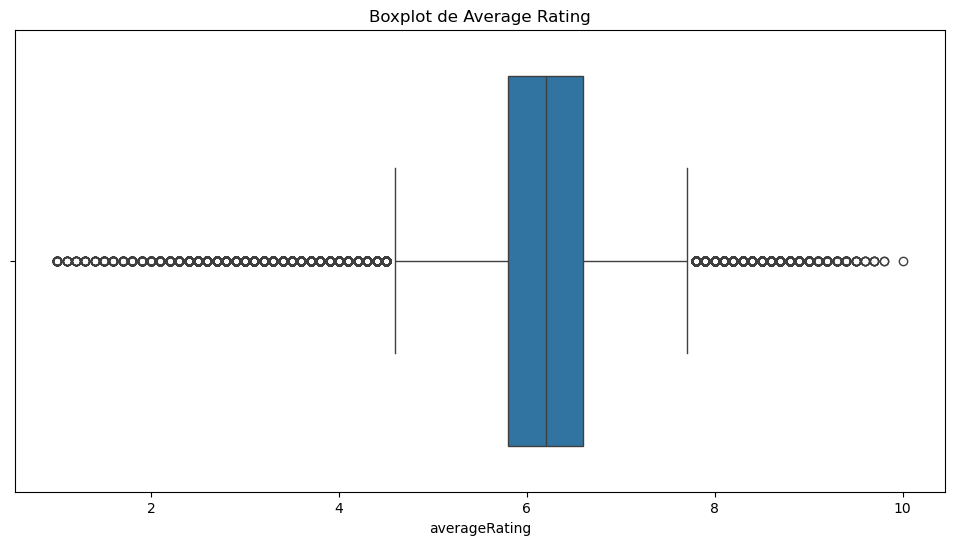

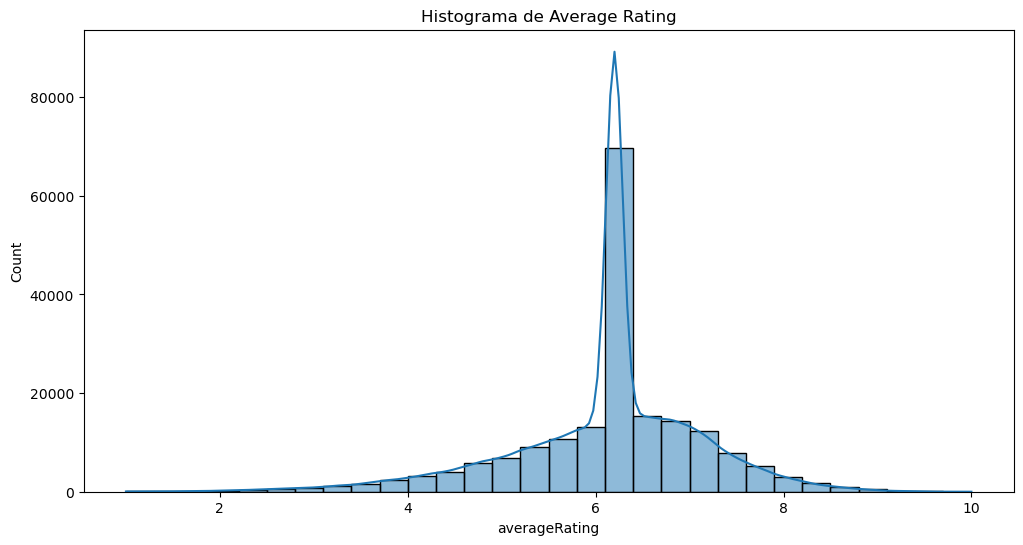

In [ ]:
# Boxplot para Average Rating
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='averageRating')
plt.title('Boxplot de Average Rating')
plt.show()

# Histograma para Average Rating con KDE
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['averageRating'].dropna(), bins=30, kde=True)  # Usamos dropna() para eliminar valores nulos
plt.title('Histograma de Average Rating')
plt.show()

# Seleccionamos solo columnas numéricas
numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculamos la matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualización de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10})
plt.title('Correlación entre Variables')
plt.show()



**Paso 5: Limpieza de Géneros**

Eliminamos géneros que no son relevantes para el análisis, como [No genres listed]. También filtramos aquellos que aportan poco al proyecto, dejando únicamente los géneros principales.



In [ ]:
# Cargamos el DataFrame limpio (verifica si el archivo existe en la ruta correcta)
df_combined = pd.read_csv('nombre_del_archivo.csv')

# Reemplazamos valores '\N' con NaN para tratarlos como faltantes
df_combined.replace('\\N', pd.NA, inplace=True)

# Convertimos las columnas 'startYear', 'endYear', y 'runtimeMinutes' a numéricas
df_combined['startYear'] = pd.to_numeric(df_combined['startYear'], errors='coerce')
df_combined['endYear'] = pd.to_numeric(df_combined['endYear'], errors='coerce')
df_combined['runtimeMinutes'] = pd.to_numeric(df_combined['runtimeMinutes'], errors='coerce')

# Revisar el número de valores faltantes en cada columna después de la conversión
print(df_combined.isnull().sum())

# Eliminamos las filas que tienen valores faltantes en 'genres'
df_cleaned = df_combined.dropna(subset=['genres'])

# Verificamos que el DataFrame limpio no tenga valores faltantes en 'genres'
print(df_cleaned.info())

# Eliminamos la columna 'endYear' del DataFrame
df_cleaned.drop('endYear', axis=1, inplace=True)

# Verificamos la estructura del DataFrame después de la eliminación
print(df_cleaned.info())

# Eliminar géneros no deseados
genres_to_remove = ['News', 'Short', 'Reality-TV', 'Talk-Show', 'Game-Show']
df_cleaned['genres'] = df_cleaned['genres'].apply(lambda x: ', '.join([g for g in x.split(', ') if g not in genres_to_remove]))

# Conteo de géneros y mostrar los 15 más comunes
top_genres = df_cleaned['genres'].str.split(', ').explode().value_counts().head(15)

# Visualización de los 15 géneros más comunes
top_genres.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 15 Géneros Más Comunes')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.show()

# Crear subgrupos y visualización
subgroup_map = {'Drama': 'Dramas', 'Romance': 'Dramas', 'Comedy': 'Comedia', 'Action': 'Acción y Aventura', 'Crime': 'Acción y Aventura'}
df_cleaned['subgroup'] = df_cleaned['genres'].apply(lambda x: next((subgroup_map[g] for g in x.split(', ') if g in subgroup_map), 'Documentales y Otros'))
subgroup_counts = df_cleaned.groupby('subgroup').size()

# Visualización de los subgrupos
subgroup_counts.plot(kind='bar', figsize=(10, 6), color='lightcoral')
plt.title('Distribución de Subgrupos de Géneros')
plt.xlabel('Subgrupo')
plt.ylabel('Número de Películas')
plt.show()

# Merge con top_grossing (asegúrate de que el archivo top_grossing.csv esté en la ruta correcta)
top_grossing = pd.read_csv('Top_1000_Highest_Grossing_Movies_Of_All_Time.csv').rename(columns={'Movie Title': 'primaryTitle'})
df_merged = pd.merge(df_cleaned, top_grossing, on='primaryTitle', how='left')

# Visualización de boxplots
sns.boxplot(data=df_cleaned, x='Duration').set(title='Boxplot de Duration')
sns.boxplot(data=df_cleaned, x='Gross').set(title='Boxplot de Gross')

# Detección de outliers con IQR
def detectar_outliers(df, columna):
    Q1, Q3 = df[columna].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    return df[(df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR))]

outliers_duration = detectar_outliers(df_cleaned, 'Duration')
outliers_gross = detectar_outliers(df_cleaned, 'Gross')

# Resumen de géneros
unique_genres_count = df_cleaned['genres'].nunique()
genre_counts = df_cleaned['genres'].str.split(',').explode().value_counts()

# Visualización de la frecuencia de géneros
genre_counts.plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Frecuencia de Géneros en el Dataset')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.show()


Total de géneros únicos en 'genres': 190
Total de géneros únicos en 'Genre': 137

Frecuencia de géneros en 'genres':
genres
Drama          357
Adventure      298
Action         282
Comedy         268
Thriller       117
Fantasy        114
Romance        114
Crime          105
Family         103
Animation       92
Sci-Fi          83
Mystery         50
Horror          45
History         23
Musical         18
Documentary     18
Biography       17
Music           11
Western         11
War             11
Adult           11
Sport            9
Film-Noir        5
Name: count, dtype: int64

Frecuencia de géneros en 'Genre':
Genre
Animation,Adventure,Comedy    101
Action,Adventure,Sci-Fi        72
Action,Adventure,Fantasy       39
Action,Adventure,Thriller      30
Comedy,Romance                 29
                             ... 
Drama,War                       1
Action,Comedy,Sci-Fi            1
Biography,Comedy,Drama          1
Action,Crime,Romance            1
Crime,Drama,Romance             

**Paso 6: Feature Engineering**


En esta sección generamos nuevas variables a partir de las existentes, como indicadores binarios para géneros. Este paso es fundamental para preparar los datos antes de entrenar los modelos predictivos.

In [ ]:

# Carga y preprocesamiento del dataset
df = pd.read_csv('C:/Users/alber/df_cleaned.csv', low_memory=False)
df['genres'] = df['genres'].fillna('')  # Limpieza de valores nulos en 'genres'
df['genres_list'] = df['genres'].str.split(', ')

# Codificación de los géneros
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df['genres_list'])
df_encoded = pd.DataFrame(genres_encoded, columns=mlb.classes_)

# Unión de los géneros codificados y eliminación de las columnas originales
df = pd.concat([df, df_encoded], axis=1).drop(['genres', 'genres_list'], axis=1)

# Preparación de los datos para el modelo
X = df.drop(columns=['startYear', 'endYear'])
y = df['genres']
y = y.where(y.isin(y.value_counts().nlargest(10).index), other='Otros')

# Conversión de variables categóricas a categorías y OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'  # Mantener las demás columnas sin cambios
)
X_encoded = preprocessor.fit_transform(X)

# División del conjunto de datos en entrenamiento y prueba (estratificada)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Entrenamiento del modelo de regresión logística multinomial
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100)
model.fit(X_train, y_train)

# Evaluación del modelo
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Guardamos el DataFrame limpio en la base de datos
from sqlalchemy import create_engine
engine = create_engine('sqlite:///movies_database.db')
df.to_sql('cleaned_movies', con=engine, if_exists='replace', index=False)

# Consultar datos desde la base de datos
query = "SELECT * FROM cleaned_movies WHERE startYear >= 2000"
df_result = pd.read_sql(query, con=engine)
print(df_result.head())


      tconst titleType                    primaryTitle  \
0  tt0000574     movie     The Story of the Kelly Gang   
1  tt0000615     movie              Robbery Under Arms   
2  tt0000630     movie                          Hamlet   
3  tt0000675     movie                     Don Quijote   
4  tt0000679     movie  The Fairylogue and Radio-Plays   

                    originalTitle  isAdult  startYear  endYear  \
0     The Story of the Kelly Gang        0     1906.0      NaN   
1              Robbery Under Arms        0     1907.0      NaN   
2                          Amleto        0     1908.0      NaN   
3                     Don Quijote        0     1908.0      NaN   
4  The Fairylogue and Radio-Plays        0     1908.0      NaN   

   runtimeMinutes                      genres            directors  \
0            70.0  Action,Adventure,Biography            nm0846879   
1             NaN                       Drama            nm0533958   
2             NaN                       Dram

In [ ]:


# Clave de API de TMDb
api_key = "914cd9894cc765eee326331be20df15d"
base_url = "https://api.themoviedb.org/3/search/movie"

# Ruta para CSV y base de datos
csv_path = "/content/drive/My Drive/df_cleaned_with_gross_progress.csv"
db_path = "/content/drive/My Drive/movies_database.db"

# Cargar el archivo CSV
df_cleaned = pd.read_csv(csv_path)

# Conectar a la base de datos SQLite
conn = sqlite3.connect(db_path)

# Encontrar el último índice procesado con éxito
ultimo_indice_procesado = df_cleaned[df_cleaned['Gross'].notna()].index.max() if not pd.isna(df_cleaned['Gross'].max()) else -1

# Filtrar las películas sin ingresos
temp_df = df_cleaned.loc[ultimo_indice_procesado + 1:].copy()

# Función optimizada para obtener el ingreso bruto de la película usando la API de TMDb
def obtener_ingreso_tmdb(titulo, anio=None):
    try:
        params = {"api_key": api_key, "query": titulo, "year": anio}
        response = requests.get(base_url, params=params, timeout=10)
        response.raise_for_status()

        # Si se encuentra la película
        data = response.json()
        if 'results' in data and data['results']:
            movie_id = data['results'][0]['id']
            movie_url = f"https://api.themoviedb.org/3/movie/{movie_id}"
            movie_response = requests.get(movie_url, params={"api_key": api_key}, timeout=10)
            movie_response.raise_for_status()
            return movie_response.json().get('revenue', None)
        return None
    except requests.exceptions.RequestException as e:
        print(f"Error al obtener datos para {titulo}: {e}")
        return None

# Iterar sobre las películas y llenar los ingresos
batch_size = 50
for idx, row in temp_df.iterrows():
    try:
        titulo = row['title']
        anio = row.get('year', None)
        ingreso = obtener_ingreso_tmdb(titulo, anio)

        if ingreso:
            temp_df.at[idx, 'Gross'] = ingreso
            print(f"Ingreso encontrado para {titulo} ({anio}): {ingreso}")
        else:
            print(f"Ingreso no encontrado para {titulo} ({anio})")

        # Guardar progreso cada 'batch_size' iteraciones
        if (idx + 1) % batch_size == 0 or idx == len(temp_df) - 1:
            df_cleaned.update(temp_df)
            df_cleaned.to_sql('cleaned_movies', con=conn, if_exists='replace', index=False)
            df_cleaned.to_csv(csv_path, index=False)
            print(f"Progreso guardado hasta la película índice {idx + 1}.")

        # Pausa para evitar límites de la API
        time.sleep(1)

    except Exception as e:
        print(f"Error inesperado en índice {idx}: {e}")
        continue

# Guardar resultados finales
df_cleaned.to_sql('cleaned_movies', con=conn, if_exists='replace', index=False)
df_cleaned.to_csv("/content/drive/My Drive/df_cleaned_with_gross_final.csv", index=False)
conn.close()
print("Base de datos y archivo CSV actualizados con los ingresos de TMDb.")

# Cargar el archivo final con los ingresos
df = pd.read_csv('/content/drive/My Drive/merged_cleaned_imputed_with_gross.csv')

# Preprocesamiento de datos
df.dropna(subset=['gross'], inplace=True)  # Eliminar filas con 'gross' nulos
df['gross'] = df['gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)  # Limpieza de la columna 'gross'
df['genres_list'] = df['genres'].str.split(', ')  # Dividir los géneros en una lista

# Codificación de los géneros
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df['genres_list'])
df_genres = pd.DataFrame(genres_encoded, columns=mlb.classes_)
df = pd.concat([df, df_genres], axis=1)

# Categorizar 'gross'
df['gross_category'] = pd.cut(df['gross'], bins=[0, 1e7, 1e8, float('inf')], labels=['Bajo', 'Medio', 'Alto'])

# Selección de variables predictoras
X = df.drop(columns=['genres', 'genres_list', 'gross', 'gross_category'])
y = df['gross_category']

# Imputación de valores faltantes
X.fillna(X.median(), inplace=True)

# Normalización de las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar y evaluar un modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))





Mounted at /content/drive
Ingreso no encontrado para AARYAN (1988.0)
Ingreso encontrado para An Eyes for an Eyes (2000.0): 370720
Ingreso no encontrado para Is this really evil? (2019.0)
Ingreso encontrado para Fast & Furious (2009.0): 363164265
Ingreso encontrado para Milk (2008.0): 54600000
Ingreso no encontrado para ARIYATH VEETHIGAL (1984.0)
Ingreso no encontrado para SANGHARSHAM (1981.0)
Ingreso no encontrado para SUBHAYATHRA (1990.0)
Ingreso no encontrado para MAAZA MULGA (1995.0)
Ingreso no encontrado para UPKAR DUDHACHE (1991.0)
Ingreso no encontrado para Green Finger (2019.0)
Ingreso no encontrado para Schmetterlinge (2020.0)
Ingreso no encontrado para Fraemling (2019.0)
Ingreso no encontrado para Nömadak Tx (2006.0)
Ingreso no encontrado para Eccentricities of a Blonde-Haired Girl (2009.0)
Ingreso no encontrado para Solo (2007.0)
Ingreso no encontrado para Lucidité passagère (2009.0)
Ingreso no encontrado para Dylan Dog: Dead of Night (2010.0)
Ingreso no encontrado para Angel

**Paso 7: Preprocesamiento y modelado**


Se realiza la limpieza de datos y la codificación de los géneros cinematográficos. Luego, prepara los datos para entrenar modelos de regresión lineal, XGBoost y Random Forest para predecir los ingresos de taquilla. Además, optimiza el modelo Random Forest mediante GridSearchCV para encontrar los mejores parámetro

In [ ]:
# Montar Google Drive y cargar el dataset
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/merged_cleaned_imputed_with_gross.csv'
df = pd.read_csv(file_path)

# Preprocesamiento: seleccionar columnas relevantes y limpiar datos
df = df[['genres', 'gross', 'averagerating', 'numvotes', 'runtimeminutes']].dropna(subset=['gross'])
df['gross'] = df['gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Codificar géneros y clasificar 'gross' en categorías
df['genres_list'] = df['genres'].str.split(', ')
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df['genres_list'])
df_genres = pd.DataFrame(genres_encoded, columns=mlb.classes_)
df = pd.concat([df, df_genres], axis=1)

# Clasificación de la columna 'gross' en categorías: Bajo, Medio, Alto
df['gross_category'] = pd.cut(df['gross'], bins=[0, 1e7, 1e8, float('inf')], labels=['Bajo', 'Medio', 'Alto'])

# Selección de las características (X) y la variable objetivo (y)
X = df.drop(columns=['genres', 'genres_list', 'gross', 'gross_category'])
y = df['gross_category']

# Imputar valores nulos en X y normalizar las características
X.fillna(X.median(), inplace=True)  # Imputación de valores nulos con la mediana de cada columna
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Balancear las clases con SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Entrenar un modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Realizar predicciones y evaluar el modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Conectar a la base de datos SQLite y obtener géneros de la tabla 'cleaned_movies'
conn = sqlite3.connect("/content/drive/My Drive/movies_database.db")
query = "SELECT genres FROM cleaned_movies"
df_genres_db = pd.read_sql(query, con=conn)
conn.close()

# Expandir los géneros y guardar combinaciones únicas
df_genres_db['genres'] = df_genres_db['genres'].fillna('')  # Rellenar valores nulos
genres_expanded = df_genres_db['genres'].str.get_dummies(sep=',')  # Dividir los géneros y crear columnas binarias

# Eliminar combinaciones duplicadas de géneros
genres_expanded.drop_duplicates(inplace=True)

# Guardar las combinaciones únicas de géneros en un archivo CSV
genres_expanded.to_csv('/content/drive/My Drive/genres_combinations.csv', index=False)
print("Las combinaciones únicas de géneros se han guardado correctamente.")



Mounted at /content/drive
Archivo cargado exitosamente.
    tconst_x titletype             title      originaltitle  isadult    year  \
0  tt0011216     movie    Spanish Fiesta  La fête espagnole        0  2019.0   
1  tt0011801     movie  Tötet nicht mehr   Tötet nicht mehr        0  2019.0   
2  tt0015724     movie     Dama de noche      Dama de noche        0  1993.0   
3  tt0016906     movie        Frivolinas         Frivolinas        0  2014.0   
4  tt0035423     movie    Kate & Leopold     Kate & Leopold        0  2001.0   

   endyear  runtimeminutes                  genres  directors  \
0      NaN            67.0                   Drama  nm0241273   
1      NaN             NaN            Action,Crime  nm0681726   
2      NaN           102.0   Drama,Mystery,Romance  nm0529960   
3      NaN            80.0          Comedy,Musical  nm0136068   
4      NaN           118.0  Comedy,Fantasy,Romance  nm0003506   

               writers  averagerating  numvotes   tconst_y       gross  

<ipython-input-4-89b0d8dfa267>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['gross'], inplace=True)
<ipython-input-4-89b0d8dfa267>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gross'] = df['gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)


Valores faltantes antes de imputación en X:
averagerating       17509
numvotes            17509
runtimeminutes      13403
Action                  0
Action,Adult            0
                    ...  
Thriller                0
Thriller,War            0
Thriller,Western        0
War                     0
Western                 0
Length: 871, dtype: int64
Valores faltantes después de imputación en X:
averagerating       0
numvotes            0
runtimeminutes      0
Action              0
Action,Adult        0
                   ..
Thriller            0
Thriller,War        0
Thriller,Western    0
War                 0
Western             0
Length: 871, dtype: int64
Distribución antes de SMOTE: Counter({'Bajo': 68102, 'Medio': 2401, 'Alto': 869})
Distribución después de SMOTE: Counter({'Bajo': 68102, 'Alto': 68102, 'Medio': 68102})
Reporte de Clasificación:
              precision    recall  f1-score   support

        Alto       0.53      0.55      0.54       224
        Bajo       0.99   

In [ ]:
# Cargar archivo desde Google Drive
file_path = '/content/drive/MyDrive/df_cleaned_with_gross.csv'

# Verificar si el archivo existe
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    df = None

if df is not None:
    # Filtrar columnas relevantes y realizar un muestreo aleatorio
    relevant_columns = ['genres', 'runtime', 'Gross']
    df_sample = df[relevant_columns].dropna(subset=['Gross'])  # Eliminar filas con 'Gross' nulos
    df_sample = df_sample.sample(frac=0.2, random_state=42)  # Muestreo del 20%

    # Separar géneros múltiples en columnas binarias
    genres_split = df_sample['genres'].str.get_dummies(sep=', ')
    df_sample = pd.concat([df_sample, genres_split], axis=1)

    target_genre = 'Action'  # Género objetivo
    if target_genre in genres_split.columns:
        # Separar características (X) y objetivo (y)
        X = df_sample.drop(columns=[target_genre, 'genres'])
        y = df_sample[target_genre]

        # División de datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Definir el pipeline para escalar y entrenar el modelo
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', LogisticRegression(max_iter=200, class_weight='balanced'))
        ])

        # GridSearchCV para optimización de hiperparámetros
        param_grid = {
            'model__C': [0.1, 1, 10],
            'model__penalty': ['l2']
        }
        grid_search = GridSearchCV(pipeline, param_grid, cv=5)
        grid_search.fit(X_train, y_train)

        # Evaluar el modelo con los mejores parámetros
        y_pred = grid_search.best_estimator_.predict(X_test)
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
        print("Classification Report:\n", classification_report(y_test, y_pred))

        # Mostrar las predicciones
        predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
        print(predictions.head())
    else:
        print(f"Género '{target_genre}' no disponible en los datos procesados.")





Archivo cargado exitosamente.
Columnas disponibles en el DataFrame: Index(['tconst', 'titleType', 'title', 'originalTitle', 'isAdult', 'year',
       'endYear', 'runtime', 'genres', 'directors', 'writers', 'rating',
       'numVotes', 'Gross'],
      dtype='object')
Valores únicos en 'genres': ['Drama' 'Action,Crime' 'Drama,Mystery,Romance' 'Comedy,Musical'
 'Comedy,Fantasy,Romance' 'Action,Adventure' 'Drama,War' 'Documentary,War'
 'Drama,Fantasy' 'Drama,Romance' 'Comedy' 'Documentary' 'Action,Comedy'
 'Drama,Thriller' 'Action,Drama,Thriller' 'Documentary,Sport'
 'Adult,Comedy' 'Horror' 'Comedy,Drama' 'Comedy,Romance' 'Fantasy'
 'Crime,Horror' 'Adventure,Comedy,Horror' 'Documentary,Horror'
 'Horror,Sci-Fi' 'Drama,Horror' 'Drama,History' 'Action,Drama'
 'Adventure,Comedy,Drama' 'Sci-Fi' 'Action,Adventure,Comedy' 'Action'
 'Action,Crime,Mystery' 'Drama,Sport' 'Adventure,Western' 'Comedy,Crime'
 'Action,Thriller' 'Biography,Drama,Romance' 'Crime'
 'Comedy,Drama,Romance' 'Thriller' 'Advent

KeyError: 'gross'

**Paso 8: Entrenamiento del Modelo Predictivo**

Implementamos un modelo de regresión logística multinomial para predecir los géneros cinematográficos que podrían prevalecer o declinar en el futuro. Configuramos las variables independientes y dependientes, entrenamos el modelo y evaluamos su rendimiento.

In [ ]:

# Función para cargar y limpiar los datos
def load_and_clean_data(file_path):
    try:
        df = pd.read_csv(file_path)
        df = df.dropna(subset=['Gross'])
        return df
    except Exception as e:
        print(f"Error al cargar el archivo: {e}")
        return None

# Función para realizar el análisis exploratorio
def exploratory_data_analysis(df):
    # Separar y explotar géneros
    df_expanded = df.explode('genres').dropna(subset=['genres'])

    # Análisis de frecuencia y promedio de ingresos por género
    genre_frequency = df_expanded['genres'].value_counts()
    avg_income_by_genre = df_expanded.groupby('genres')['Gross'].mean()

    print(f"Géneros más frecuentes:\n{genre_frequency.head()}")
    print(f"\nGéneros menos frecuentes:\n{genre_frequency.tail()}")
    print(f"\nGéneros más frecuentes por ingresos:\n{avg_income_by_genre.sort_values(ascending=False).head()}")
    print(f"\nGéneros menos frecuentes por ingresos:\n{avg_income_by_genre.sort_values(ascending=True).head()}")

    return df_expanded

# Función para preparar los datos para el modelo
def prepare_data(df_expanded):
    # Codificar géneros
    df_expanded['genres_encoded'] = LabelEncoder().fit_transform(df_expanded['genres'])
    X = df_expanded[['genres_encoded']]
    y = df_expanded['Gross']

    # División de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

# Modelo de regresión lineal
def train_linear_regression(X_train, y_train, X_test, y_test):
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"\nMSE de Regresión Lineal: {mse}")
    return y_pred

# Modelo XGBoost
def train_xgboost(X_train, y_train, X_test, y_test):
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    print(f"RMSE XGBoost: {rmse_xgb}")
    return y_pred_xgb

# Modelo Random Forest
def train_random_forest(X_train, y_train, X_test, y_test):
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
    print(f"RMSE Random Forest: {rmse_rf}")
    return y_pred_rf

# Optimización de Random Forest con GridSearchCV
def optimize_random_forest(X_train, y_train, X_test, y_test):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_rf_model = grid_search.best_estimator_
    y_pred_best_rf = best_rf_model.predict(X_test)
    rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
    print(f"RMSE Random Forest Optimizado: {rmse_best_rf}")
    return y_pred_best_rf

# Cargar y procesar los datos
file_path = '/content/drive/MyDrive/df_cleaned_with_gross.csv'
df = load_and_clean_data(file_path)

if df is not None:
    # Realizar EDA
    df_expanded = exploratory_data_analysis(df)

    # Preparar los datos para modelado
    X_train, X_test, y_train, y_test = prepare_data(df_expanded)

    # Entrenar modelos
    y_pred_lr = train_linear_regression(X_train, y_train, X_test, y_test)
    y_pred_xgb = train_xgboost(X_train, y_train, X_test, y_test)
    y_pred_rf = train_random_forest(X_train, y_train, X_test, y_test)
    y_pred_best_rf = optimize_random_forest(X_train, y_train, X_test, y_test)

else:
    print("No se pudo cargar el dataset.")



Combinaciones de géneros menos frecuentes:
genres
War        140
Musical    101
Western     39
Adult       38
News         2
Name: count, dtype: int64

Combinaciones de géneros con menos ingresos:
genres
Sci-Fi      9.305097e+07
Sport       3.366246e+07
Thriller    5.252001e+07
War         3.836882e+07
Western     3.635077e+07
Name: Gross, dtype: float64


<ipython-input-15-ae67345c1e2b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exploded['genres'] = df_exploded['genres'].str.split(',')


In [3]:
# Montar Google Drive y cargar el archivo CSV
import pandas as pd
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Cargar el dataset
file_path = '/content/drive/My Drive/df_cleaned_with_gross.csv'
df = pd.read_csv(file_path)

# Verificar si la columna 'main_genre' ya existe; si no, crearla a partir de 'genres'
if 'main_genre' not in df.columns:
    if 'genres' in df.columns:
        # Crear columna 'main_genre' con el primer género en la lista de géneros
        df['main_genre'] = df['genres'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else 'Unknown')
    else:
        raise KeyError("El archivo CSV no contiene las columnas 'main_genre' ni 'genres'.")

# Calcular la distribución de géneros en el DataFrame
genre_counts = df['main_genre'].value_counts().reset_index(name='count').set_index('main_genre')
total_movies = genre_counts['count'].sum()

# Calcular el porcentaje de películas por género
genre_counts['percentage'] = (genre_counts['count'] / total_movies) * 100

# Obtener los seis géneros más y menos producidos
top_6_genres = genre_counts.nlargest(6, 'count')
bottom_6_genres = genre_counts.nsmallest(6, 'count')

# Mostrar los resultados
print("\nSeis géneros más producidos:")
print(top_6_genres)
print("\nSeis géneros menos producidos:")
print(bottom_6_genres)





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Seis géneros más producidos:              count  percentage
main_genre                    
Drama        24794   27.974095
Comedy       18864   21.283509
Documentary  13521   15.255213
Action       11477   12.949048
Adult         3965    4.473554
Crime         3749    4.229849

Seis géneros menos producidos:             count  percentage
main_genre                   
News            3    0.003385
Sport          27    0.030463
Western        78    0.088004
History        82    0.092517
Music         107    0.120724
War           144    0.162470
